# Assignment 2: Predicting King County Housing Prices

Machine Learning

Richard Teller

## Part 1: Preparing the data


Load the data into a dataframe and checkout the data.

In [1]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [2]:
df.shape

(21613, 21)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Let's remove the id, date (date house was sold), and the lat and long (latitude and longitude coordinates) columns from our dataframe as I would imagine they wouldn't have a positive effect in our prediction.  After we've removed those columns lets look at some graphs comparing the columns to eachother to get an idea how the categories might affect the data.

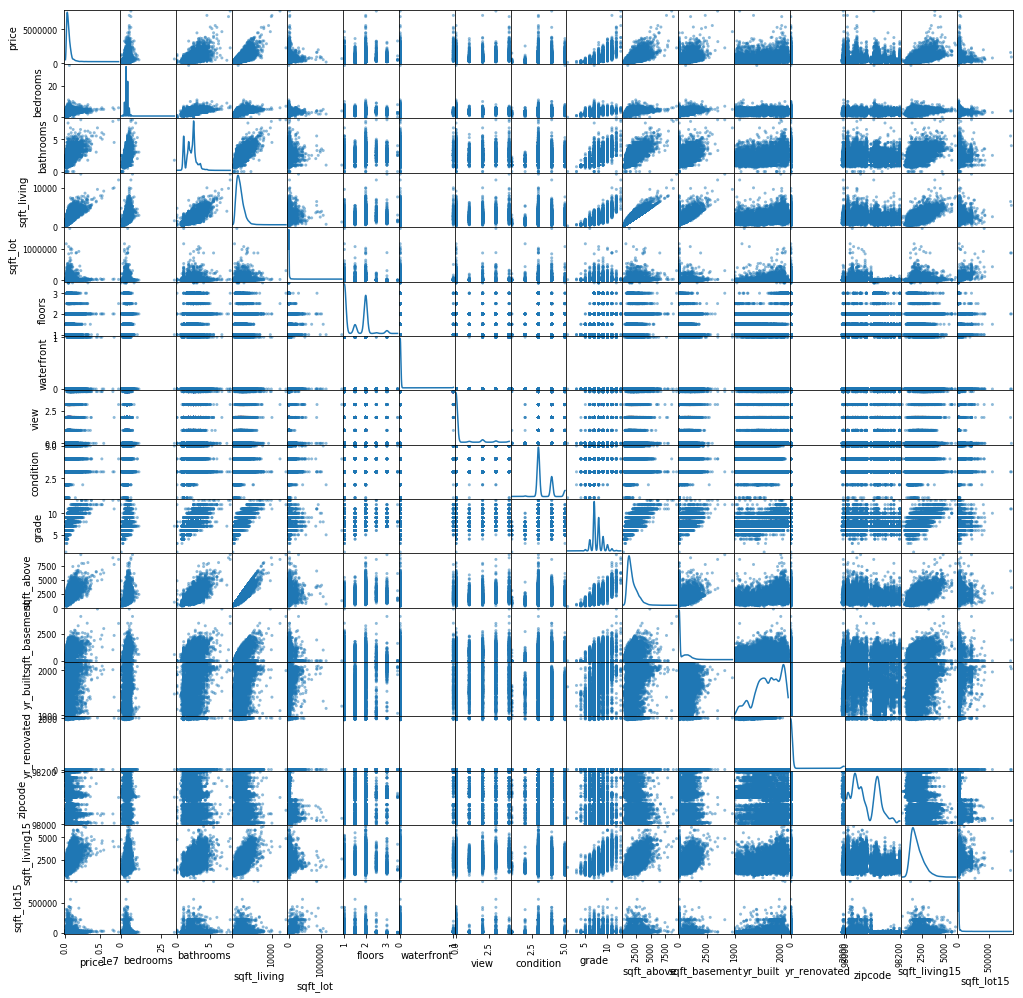

In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

moddf = df.drop(['id', 'date', 'lat', 'long'], axis=1) #axis = 1 means remove column
scatter_matrix(moddf, figsize=(17, 17), diagonal='kde')
plt.show()

Some observations from the graphs:
* At first I thought yr_built would have an impact on price, but interestingly enough, and it makes sense, it does not have a linear relationship with price.  There are both very nice and not so nice old houses, and likewise very nice and not so nice newer houses.  yr_renovated produces similar results probably due to the same theory.

* zipcode clearly shows that certain zipcodes have a greater number of expensive houses, and other zipcodes have not so many expensive houses.  Useful information, but we cannot use it alone for a linear model.

* Aside from that, bathrooms, sqft_living, grade, sqft_above, and possibly sqft_basement, all look like decent predictors for predicting the house price since they appear to form a linear shape with price (from the top row of graphs).

Let's continue cleaning up the data by removing data with missing values etc.

In [5]:
nulldf = df.isnull() # get all the null rows
nulldf.sum(axis=0) # count how many rows of data we found to be null

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

So every house has no missing values then.

### Part 1 Questions:
**Is there any data missing (Nan)? If so, how would you remove it?**

There is no missing data as shown above.  If there was, say, a certain column that had a lot of missing values, it would probably be a good idea to just get rid of the whole column.  You could do that with ```moddf = df.drop(['columnToRemove'], axis=1)``` to remove the whole column from the dataframe.  Or if you wanted to remove any row that had atleast one missing column value you could do ```moddf = df.dropna(axis=0, how='any')```.

**What columns appear to offer the best hope of a linear approximation of price?**

As mentioned previously, bathrooms, sqft_living, grade, sqft_above, and possibly sqft_basement all look like decent predictors because they appear to have a linear relationship with price on their graphs (the data forms a line).  We want the data to look like its forming a line because we of course are going to approximate a linear equation to model the data, so our hope is that the data looks to already fit closely to a line.

**Which columns of data are categorical? Which are numerical?**

Categorical data would be data that falls into a set of categories where the data only has a select number of choices to be where usually it either is or isn't something.  Numerical data on the other hand would be data that can take on many values not just a select few, usually a value that describes how much of one thing it has. In short: categorical - which thing? numerical - how much of that one thing?

Categorical Columns:  floors, waterfront, view, condition, grade, yr_renovated, zipcode, lat, long

Numerical Columns:  bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, sqft_living15, sqft_lot15

**Which is the "best" column to use for prediction? (Judgment call)**

sqft_living looks to be the best to me because its plot looks to form the best linear relationship, all the data on the graph is relatively close to where the line looks to appear (the data looks more squished along the line) where as the other potentially good predictors all seem to flare out on the right ends of their graphs creating uncertainty as that predictor reaches a higher value (for example, bathrooms or sqft_basement).  If not sqft_living, grade would be the second choice.


## Part 2: Model the data using only one predictor

Let's see how well sqft_living actually predicts house price.  We will use sqft_living as our only predictor for a linear regression model.

In [6]:
# make the predictor matrix and label vector
X = df[['sqft_living']].as_matrix()
y = df[['price']].as_matrix()

# make the linear regression object
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# split the data for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the model
lr.fit(X_train, y_train)

# check the weights created for the model, these would be our betas
lr.coef_,lr.intercept_

(array([[ 278.81171349]]), array([-39837.93923129]))

In [7]:
# generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# Check the statistics of the model
from sklearn import metrics

metrics.r2_score(y_test, test_predicted)

0.49460388364874042

So our R squared score is 0.482 when using a random 80% of the data.  Let's see a plot of how a linear regression using sqft_living would look like against the entire data set.

/home/rbt/test/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


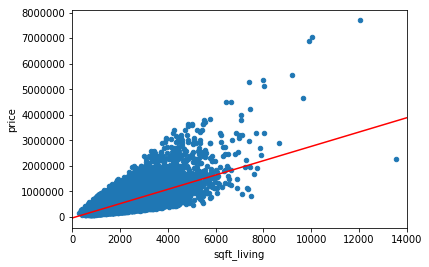

In [8]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('price ~ sqft_living', data=df, return_type='dataframe')
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
p = results.params
xs = np.arange(0, 14000)


# scatter-plot data
ax = df.plot(x='sqft_living', y='price', kind='scatter')

# plot regression line on the same axes, set x-axis limits
ax.plot(xs, p.Intercept + p.sqft_living * xs, color='red')
ax.set_xlim([0, 14000])
plt.show()

### Part 2 Questions:
**How might you choose which column is best for the predictive model?**

One thing we can do is display a chart that lists several statistical values about each column and compare the t values of each column.  The t value would tell us which columns have the most influence on the data, and perhaps more importantly, which ones do not have any influence on the prediction (t value of about less than 3).  We can do this like so:

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:39:20   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we see sqft_living has a t value of 144.920, which is very high.  If we had more predictors loaded into our current model right now, they would show up below the sqft_living row, and we would be able to compare the different t values among the different predictors.

**Can you compare the quality of the different columns as predictors before you train a model? How?**

We can use the scatter matrix from before to pick out a column that creates a plot where the data looks to form a line.  We will want to look for graphs that have a nice looking linear relationship with the x and y axes where the data isn't too spaced out but rather looks to hug the line.  sqft_living looks to produce a somewhat promising linear relationship as well as the grade category.

**How many rows are in the training data? How many rows in the test data?**

In [10]:
X_train.shape, X_test.shape

((17290, 1), (4323, 1))

So there is 17290 rows of data in the training set and 4323 rows of data in the test set.  This confirms that our test set was 20% of the total data set.

**What do the metric scores tell you about the model?**

The metric score we calculated from ```metrics.r2_score(y_test, test_predicted)``` is the R squared value.  The value we got from our 80% training set was 0.482.  The R squared value tells us how well the linear regression model fits the data, the higher being better.  On its own it can be misleading, but it is most useful when comparing different models that we've created for a particular problem to determine which model is best (compare with the R squared value we get in part 3 when using multiple predictors).

## Part 3: Model the data using multiple predictors

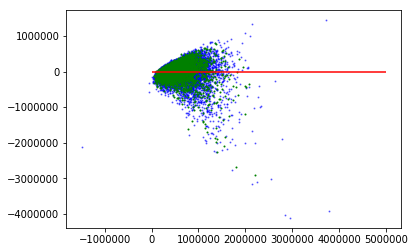

In [11]:
moddf = df.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long'], axis=1)

# Get X matrix and y vector.
X = moddf.drop(['price'], axis=1).as_matrix()
y = moddf[['price']].as_matrix()

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# plot residuals against predictions
import matplotlib.pyplot as plt
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()

In [12]:
from sklearn import metrics

metrics.r2_score(y_test, test_predicted) # determine our r squared value

0.56828252939947899

### Part 3 Questions

**What are the values of the coefficients learned by the model? What is the intercept?**

The coefficients for each column respectively are:


In [13]:
lr.coef_

array([[ -6.39181815e+04,   6.70673585e+04,   1.70439768e+02,
         -5.98835899e-03,   5.93279461e+04,   8.01169395e+01,
          9.03228285e+01,  -3.44318718e+03,   2.10795987e+01,
          8.72123400e+01,  -6.47922851e-01]])

And the intercept is:

In [14]:
lr.intercept_

array([ 6621008.7836211])

**How can I evaluate the quality of multivariate models since I can't plot them and look at them? Why can't I plot them directly?**

We can use the R squared value to estimate how well the model is representing the data.  From above we see that the R squared value for our multi predictor model came out to 0.592 which is higher than our earlier model that used only sqft_living as a predictor, that model had an R squared value of 0.482.  Thus, we can take the multi predictor model as the better one.

When we are only using one column as a predictor, its a simple 2D plot, the column vs price where price is the y axis and the column is the x axis.  When we have more than 3 predictors we're using, you can't plot it because you're essentilly trying to make a plot that has more than 3 dimensions in it.  If we're using 17 predictors, that means we have 17 dimensions.  No one knows what a 17 or more dimension plot would like.

**How does variance affect the model's ability to predict prices?**

The variance in this specific problem is affecting the regression model heavily.  The reason why the plots have the cone shape where the data flares out is because the variance is changing.  This messes up our linear regression because the data points towards the right are spaced out a lot more and begin to have a lot of unwanted leverage on the line.  These points are adding a lot of randomness to the data set and our linear regression would be a lot better if the variance was constant.

**What visual tools do I have to check for likely helpful predictors? Which metrics can help?**

There are some plots that we can look at to help us with this issue.   A residual plot will plot data points corresponding to each row of data where the y values of these new points are the error associated with that particular data piece.  The error, in our case, is the difference between the actual price and the price predicted by the regression model.  Besides a residual plot, we can use a leverage plot.  In the leverage plot we could say, examine a particular predictor, fit a linear regression model to it, and examine how individual points might be affecting that regression line.  The leverage plot is good for detecting outliers, because we can take out the point recalculate the regression model and see how much that point was affecting the regression by seeing how much the regression line has changed.

The t value is a good value to look at when trying to decide if a particular predictor has an influence on the linear regression model.  The t value tells how many standard deviations you are away from 0 or the null hypothesis.  Thus, a higher t value indicates the respective predictor has a stronger influence on the predicted outcome.

**Think about how you might use zip code to make a better model. How can we organize the 70 zip codes to provide insight into price differentiation without adding 69 dimensions to the model?**

I think what would be best is to seperate the data where the data is grouped by the individual zipcodes.  So instead of only having one dataframe for King County, we would have 70 sub dataframes for each zipcode within King County and linear regression models for each.  Then when we want to predict a house price, the zipcode for that house would be used to apply the house to the right linear regression model to predict its price.

In [15]:
df.groupby('zipcode').count()
dfbyzip = df[['zipcode', 'price', 'sqft_living', 'grade', 'bedrooms', 'bathrooms', 'yr_built']].groupby('zipcode').mean()

dfbyzip

,price,sqft_living,grade,bedrooms,bathrooms,yr_built
zipcode,,,,,,
98001,2.808047e+05,1900.856354,7.295580,3.383978,2.006215,1980.679558
98002,2.342840e+05,1627.743719,6.693467,3.326633,1.839196,1967.773869
98003,2.941113e+05,1928.882143,7.542857,3.357143,2.047321,1976.885714
98004,1.355927e+06,2909.022082,8.687697,3.854890,2.527603,1971.470032
98005,8.101649e+05,2656.803571,8.488095,3.851190,2.424107,1969.744048
98006,8.596848e+05,2888.295181,8.795181,3.841365,2.555723,1978.720884
98007,6.171051e+05,2182.056738,7.964539,3.815603,2.173759,1971.070922
98008,6.455074e+05,2133.445230,7.653710,3.734982,2.088339,1966.325088
98010,4.236660e+05,2137.590000,7.400000,3.290000,2.027500,1979.180000


Notice how both sqft_living and grade correlate with price.  It appears that in general a higher price comes with a higher sqft_living and higher grader.  Bedrooms and bathrooms, while an important feature of a house, have less of a range to work with (we see most zipcodes have houses that average 3 bathrooms, but average prices vary widely per zipcode) so they may not be as useful for linear regression on their own.